<a href="https://colab.research.google.com/github/nirmalya8/MLConceptsStudy/blob/main/CurveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will attempt **Polynomial Curve Fitting**. So, what is Polynomial Curve Fitting ? Basically, we will try to fit a polynomial function into some custom dataset and check the results. We will start by importing some of the required modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

**DATASET CREATION**

Firstly, we have to create a dataset on which we want to fit the polynomial. We have chosen the **sine** function as the basis of the dataset. Now, we want to create a dataset, which will be well approximated by the sine function. For that purpose, it makes sense to add some random noise to the values given by the sine function. This will make our dataset somewhat different from the sine function but the sine function will be able to approximate the dataset very well. 

Hence, we can consider the sine function to be the benchmark we want to attain with our polynomial.  

In [2]:
def func(x):
  return np.sin(x)

In [6]:
def create_dataset(n):
  x = np.linspace(0,10,num=n)
  y = func(x)+np.random.randn(n)*0.1
  return x,y

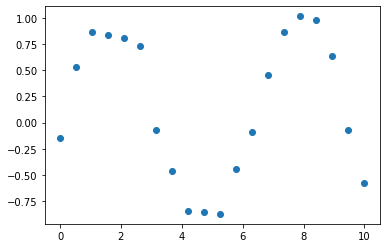

In [33]:
x,y = create_dataset(20)
plt.scatter(x,y)

The above plot represent a scatter plot of the points of our dataset. The plot below is the same as above, only the sine function is plotted in green. So, we can see that the sine function generalizes the dataset quite well.

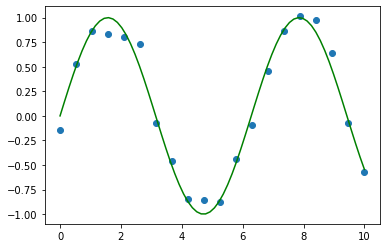

In [34]:
a = np.linspace(0,10,num=70)
plt.plot(a,np.sin(a),color='green')
plt.scatter(x,y)

---

So, let us first define the problem. We want to fit the sine curve with a polynomial of degree n. The polynomial will be of the form - 

$$ y = w_0 x^0+w_1x^1+w_2x^2+\dots+w_nx^n $$

This can also be written as :

$$ y = \sum_{i=0}^{n} {w_ix^i}$$

If we dive deeper into the Mathematics, we find that this can be represented as:

$$ w =  \begin {bmatrix}
w_1 \\ 
w_2 \\
w_3 \\
\vdots \\

w_n
 \end {bmatrix} 
 
 x = \begin {bmatrix}
x \\ 
x^2 \\
x^3 \\
\vdots \\

x^n
 \end {bmatrix}
 
 $$

So, y can be written as

$$ y = w^Tx   $$

$$ y =   \begin {bmatrix}
w_1  \   
w_2   \
w_3   \
\dots  \ 

w_n \
 \end {bmatrix} 
 
 \begin {bmatrix}
x \\ 
x^2 \\
x^3 \\
\vdots \\

x^n
 \end {bmatrix}  + w_0$$

We will apply the final equation, taking the values of w and powers of x to find an output.



---



Now that we have created the dataset, it makes sense for us to create a few helper functions. First we create a **predict function** . This function will take in the input value and the weights and give a prediction. 

In [9]:
def predict(x,w):
  x_v = [x**i for i in range(len(w))]
  return np.dot(x_v,w) 

As we are trying to fit a curve based on a dataset, it becomes very important which **loss function** we choose. Here, I have trained the models for different loss functions and found that two functions optimize the problem very well:
1. The Mean Squared Error function

$$ Error(x,y,w) = Mean\ (Predicted\ value - Actual\ Value )^2 $$
2. The Total Absolute Error function

$$ Error(x,y,w) = Sum\ |Predicted\ value - Actual\ Value | $$

In [10]:
def loss(y,x,w):
  yhat = [predict(x,w) for x in x]
  l = sum((y-yhat)**2) / len(w)
  return l,yhat

In [50]:
def lossmod(y,x,w):
  yhat = [predict(x,w) for x in x]
  l = np.sum(np.abs((y-yhat)))
  return l,yhat

---
Now that we have created the dataset and defined the loss functions, we can now move into optimization. We will use the **Gradient Descent Optimizer** here.

<img src = "/content/grad_desc.jpeg" >

As we are doing everything from scratch, I have also written the derivative calculator as **grad2** . It computes gradient based on:
$$ \frac {d f(a)}{dh} =   \lim_{h\to0} \left[\frac {f(a+h)-f(a)}{h} \right]  $$

It takes the loss function, weight vector, x, y values, the value h which is near 0 and finally val. Val is basically the index of the weight matrix, on the basis of which we want to calculate the derivative.

In [11]:
def grad2(f,w,x,y,h,val):
  b,yhat = f(y,x,w)
  w[val]+=h
  a,yhat = f(y,x,w)
  g = (a-b)/h
  return g,yhat

---

**GRADIENT DESCENT BEGINS**

In [12]:
import time

Initializing the weights matrix with 4 numbers, as we want to fit a 3degree polynomial.

In [90]:
t=time.time()
w_vector = np.random.randn(4)
print(w_vector)
time.time()-t

[ 1.02394368 -0.20008225 -0.55863091 -1.29927417]


0.0006554126739501953

In [39]:
x,y

(array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
 array([-0.14576443,  0.5313364 ,  0.86794659,  0.83164785,  0.80514719,
         0.72685062, -0.07161753, -0.46227308, -0.84263437, -0.85228129,
        -0.87175577, -0.44268354, -0.09424213,  0.45647095,  0.86066241,
         1.01403879,  0.97587676,  0.63928394, -0.07575216, -0.57383243]))

Hard coding gradient descent for 50,000 epochs 

In [91]:
t=time.time()
print(loss(y,x,w_vector))
yhat = []
lossf = []
#finding gradient wrt w[0]
for i in range(50000):
  #g4,yhat = grad2(loss,w_vector,x,y,0.0000000001,4)
  g3,yhat = grad2(loss,w_vector,x,y,0.0000000001,3)
  g2,yhat = grad2(loss,w_vector,x,y,0.0000000001,2)
  g1,yhat = grad2(loss,w_vector,x,y,0.0000000001,1)
  g0,yhat = grad2(loss,w_vector,x,y,0.0000000001,0)
  #for j in range(6):
  #  w_vector[j]-=0.1
  
  #w_vector[4]-=1e-8*g4
  #print("w[4] {}".format(w_vector[4]))
  w_vector[3]-=1e-6*g3
  #print("w[3] {}".format(w_vector[3]))
  w_vector[2]-=1e-6*g2
  #print("w[2] {}".format(w_vector[2]))
  w_vector[1]-=1e-6*g1
  #print("w[1] {}".format(w_vector[1]))
  w_vector[0]-=1e-6*g0
  #print("w[0] {}".format(w_vector[0]))
  #print(yhat)
  l,_ = loss(y,x,w_vector)
  lossf.append(l)
  if(i%500 == 0):
    print("Loss at epoch {} is {}".format(i,l))

time.time()-t

(1507741.3834124012, [1.023943679558207, 0.5744656469915569, -1.3210602702944412, -5.799191150211155, -13.996484070669949, -27.049496109582183, -46.09478434485926, -72.26890585441248, -106.70841771615328, -150.54987700799296, -204.9298408078429, -270.98486619361455, -349.8515102432193, -442.6663300345683, -550.565882645573, -674.6867251541449, -816.1654146381953, -976.1385081756357, -1155.7425628443768, -1356.1141357223312])
Loss at epoch 0 is 620656.8656332653
Loss at epoch 500 is 25.937873770971116
Loss at epoch 1000 is 14.932173286678534
Loss at epoch 1500 is 9.136403366859678
Loss at epoch 2000 is 6.083367321607256
Loss at epoch 2500 is 4.474229977274046
Loss at epoch 3000 is 3.625230559445443
Loss at epoch 3500 is 3.1764088148699265
Loss at epoch 4000 is 2.938266782096315
Loss at epoch 4500 is 2.811044813355225
Loss at epoch 5000 is 2.7422252556460345
Loss at epoch 5500 is 2.7041605876640027
Loss at epoch 6000 is 2.682295973581095
Loss at epoch 6500 is 2.6689690992681876
Loss at e

54.79805374145508

In [15]:
w_vector

array([ 1.59734985, -1.30285796,  0.2641365 , -0.01507823])

Plot of the loss with epochs

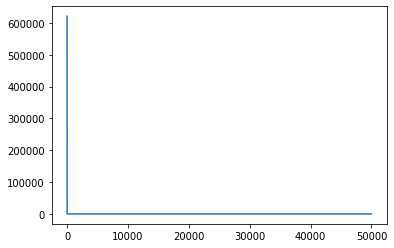

In [93]:
epochs = range(50000)
plt.plot(epochs,lossf)

Plotting the function we generated and comparing it with the benchmark sin(x) in green

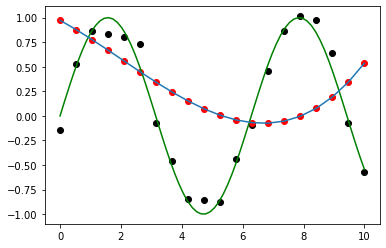

In [94]:
a = np.linspace(0,10,num=70)
plt.plot(a,np.sin(a),color='green')
plt.scatter(x,y,color='black')
plt.scatter(x,yhat,color='red')
plt.plot(x,yhat)

Now, we will try out for the 2nd loss function. We need a lot more epochs here

In [79]:
t=time.time()
w_vector = np.random.randn(4)
print(w_vector)
time.time()-t

[ 0.94427656 -0.85333441 -0.87423354 -0.78915447]


0.0023546218872070312

In [85]:
t=time.time()
print(lossmod(y,x,w_vector))
yhat = []
lossf = []
#finding gradient wrt w[0]
for i in range(50000):
  #g4,yhat = grad2(loss,w_vector,x,y,0.0000000001,4)
  g3,yhat = grad2(lossmod,w_vector,x,y,0.0000000001,3)
  g2,yhat = grad2(lossmod,w_vector,x,y,0.0000000001,2)
  g1,yhat = grad2(lossmod,w_vector,x,y,0.0000000001,1)
  g0,yhat = grad2(lossmod,w_vector,x,y,0.0000000001,0)
  #for j in range(6):
  #  w_vector[j]-=0.1
  
  #w_vector[4]-=1e-8*g4
  #print("w[4] {}".format(w_vector[4]))
  w_vector[3]-=1e-7*g3
  #print("w[3] {}".format(w_vector[3]))
  w_vector[2]-=1e-7*g2
  #print("w[2] {}".format(w_vector[2]))
  w_vector[1]-=1e-7*g1
  #print("w[1] {}".format(w_vector[1]))
  w_vector[0]-=1e-7*g0
  #print("w[0] {}".format(w_vector[0]))
  #print(yhat)
  l,_ = lossmod(y,x,w_vector)
  lossf.append(l)
  if i%1000 == 0:
    print("Loss at epoch {} is {}".format(i,l))

time.time()-t

(13.596211855132804, [0.9848566632356572, 0.7314485213544497, 0.5090727078938655, 0.31867891868150156, 0.16121684954495452, 0.037636196311821093, -0.05111334519030211, -0.10408207913381831, -0.1203203096911307, -0.09887834103464273, -0.03880647733675783, 0.06084497723012107, 0.20102571849359074, 0.38268544228124673, 0.6067738444206875, 0.8742406207395084, 1.1860354670653066, 1.543108079225679, 1.946408153048222, 2.3968853843605324])
Loss at epoch 0 is 12.816367065972468
Loss at epoch 1000 is 11.234621843401785
Loss at epoch 2000 is 11.206866355482791
Loss at epoch 3000 is 11.20911901497326
Loss at epoch 4000 is 11.20856516472299
Loss at epoch 5000 is 11.208011362516343
Loss at epoch 6000 is 11.210264023802251
Loss at epoch 7000 is 11.207546590728573
Loss at epoch 8000 is 11.207635623172374
Loss at epoch 9000 is 11.20952897304841
Loss at epoch 10000 is 11.209133546716473
Loss at epoch 11000 is 11.208738132298864
Loss at epoch 12000 is 11.206392090932214
Loss at epoch 13000 is 11.2059966

54.576741456985474

Plotting the function we generated

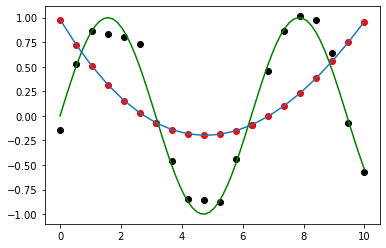

In [86]:
a = np.linspace(0,10,num=70)
plt.plot(a,np.sin(a),color='green')
plt.scatter(x,y,color='black')
plt.scatter(x,yhat,color='red')
plt.plot(x,yhat)

---
With this, we have come to the end of the notebook! Our fitted curve might look to be very different from sin x, but if we compare datapoint for datapoint in blue and black, we see that actually we have done quite well on the dataset with little data. We did better with the Mean Squared error loss function.  